<a href="https://colab.research.google.com/github/monicaoliveira83/airbnb-mexico/blob/master/Analisando_os_Dados_do_Airbnb_Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise dos dados do Airbnb - México**

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo um a **maior empresa hoteleira da atualidade**. O detalhe é que a empresa **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb criou uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, uma Startup fundada há 10 anos, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando como redes de hotéis tradicionais. Neste mesmo ano, **no Brasil**, o Airbnb divulgou que plataforma gerou um **impacto econômico direto de R$ 7,7 bilhões**.

Uma das iniciativas do Airbnb está disponibilizando dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](https://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science* .

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"> </center>

**Neste notebook, analisaremos os dados relacionados à cidade do Distrito Federal localizado no México, e quais os insights podem ser extraídos a partir dos dados brutos.**

## **Obtenção dos Dados**

Os dados utilizados para esse projeto foram obtidos a partir do [Inside Airbnb](https://insideairbnb.com)

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* **listings.csv - Summary information and metrics for listings in Distrito México City (good for visualusations).







In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [0]:
# importar o arquivo listings.csv para um Dataframe
df = pd.read_csv("http://data.insideairbnb.com/mexico/df/mexico-city/2019-11-25/visualisations/listings.csv")

# **Análise dos Dados**

Esta etapa tem por objetivo criar uma consciência situcional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

*   id - Número de id gerado para identificar o imóvel
*   name - Nome da propriedade anunciada
*   host_id - Número de id do proprietário (anfitrião) da propriedade
*   host_name - Nome do Anditrião
*   neighbourhood_group - Esta coluna não contém nenhum valor válido
*   neighbourhood - Nome do Bairro
*   latitute - Coordenada da latitude da propriedade
*   longitute - Coordenada da longitude da propriedade
*   room_type - Informa o tipo de quarto que é oferecido
*   price - Preço do aluguel
*   minimum_nigths - Quantidade mínima de noites para reservar
*   number_of_reviews - Número de reviews que a propriedade possui
*   last_review - Data do último review
*   reviews_per_month - Quantidade de reviews por mês
*   calculated_host_listings_count - Quantidade de imóveis do mesmo anfitrião
*   availability_365 - Número de dias de disponibilidade dentro de 365 dias


**Antes de iniciar qualquer análise, vamos verificar o formato do nosso *dataset*, analisando as 5 primeiras entradas.**


 












In [45]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,NaN,Cuauhtémoc,19.44076,-99.16324,Private room,1995,1,57,2019-05-27,0.50,8,332
1,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,3874,1,0,NaN,NaN,2,363
2,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41006,-99.17645,Private room,1898,1,42,2019-11-04,0.43,10,353
3,58955,Entire beautiful duplex in la Roma,282620,Nat,NaN,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1646,3,40,2019-11-07,0.41,1,132
4,70644,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,NaN,Coyoacán,19.35601,-99.16167,Entire home/apt,1065,3,96,2019-11-06,1.01,3,322


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?** 

Vamos prosseguir e indentificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv, há uma versão mais completa com 20571 entradas e 106 variáveis(listings.csv.gz)





In [46]:
# identificar o volume de dados do Dataframe
print ("Variáveis:\t {}".format(df.shape[0]))
print ("Entradas:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display (df.dtypes)

Variáveis:	 20571
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no dataset?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possível ver que a coluna neighbourhood_group possui 100% dos seus valores ausentes.
As variáveis reviews_per_month e last_review possuem valores nulos em aproximadamente 22% das linhas.
As variáveis name e host_name têm aproximadamente 0,1% dos valores nulos.

In [47]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.213942
last_review                       0.213942
host_name                         0.001507
name                              0.000438
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma

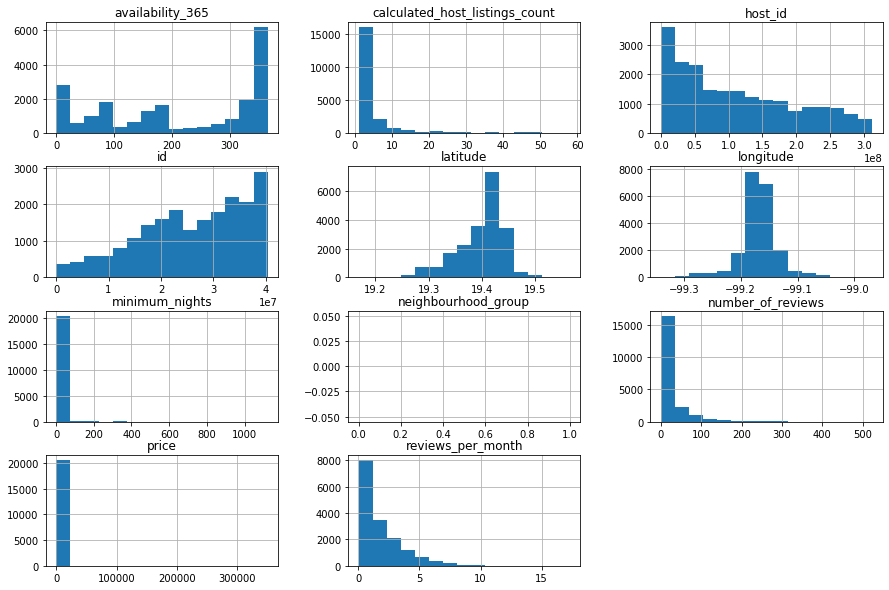

In [48]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histrograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*.

São elas:

*   Resumo estatístico por meio do método describe()
*   Plotar boxplots para a variável




In [49]:
#ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20571.000000,20571.000000,20571.000000,16170.000000,20571.000000,20571.000000
mean,1150.935054,3.760196,23.028827,1.825876,4.714744,210.830490
std,3601.870920,22.178327,39.639857,1.858464,8.391954,135.301748
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,407.000000,1.000000,1.000000,0.450000,1.000000,85.000000
50%,697.000000,2.000000,7.000000,1.190000,2.000000,207.000000
75%,1259.000000,2.000000,27.000000,2.630000,4.000000,350.000000
max,349994.000000,1122.000000,523.000000,17.320000,58.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:


*   A variável price possui 75% do valor abaixo de 1259, porém o seu valor máximo é 349994.
*   A quantidade mínima de noites (minimum_nights) está acima do limite real de 365 dias no ano.



## **Boxplot para minimum_nights**

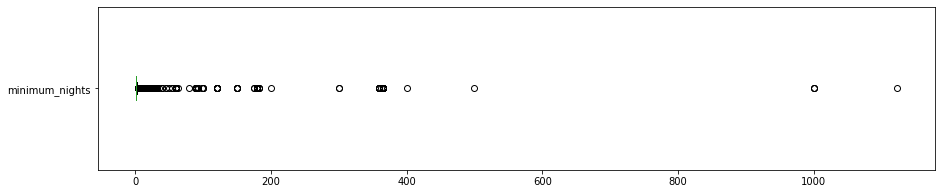

minimum_nights: valores acima de 30:
148 entradas
0.7195%


In [50]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%" .format((len(df[df.minimum_nights > 30]) / df.shape[0]) *100))

## **Boxplot para price**

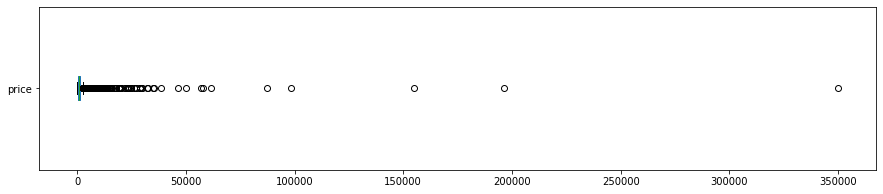


price: valores acima de 2000:
2102 entradas
10.2183%


In [51]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 2000 para price
print("\nprice: valores acima de 2000:")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%" .format((len(df[df.price > 2000]) / df.shape[0]) *100))

# df.price.plot(kind='box', vert=False, xlim = (0,1300), figsize=(15,3));

## **Histograma sem outliers**

Já que identificamos *outliers* nas variáveis price e minimum_nights, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

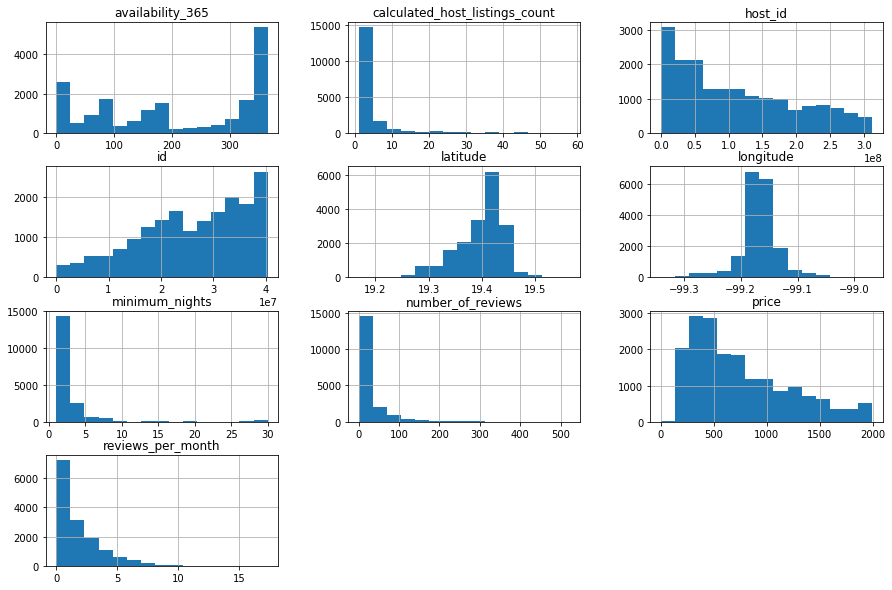

In [52]:
# remover os *outliers* em um novo Dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


### **Q5. Qual a relação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a itensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

*   Criar uma matriz de correlação
*   Gerar um *headmap* a partir dessa matriz, usando a biblioteca seaborn



In [53]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.047238,0.139296,0.110816,0.146078,0.024653
minimum_nights,-0.047238,1.000000,-0.105530,-0.173583,-0.070669,-0.021391
number_of_reviews,0.139296,-0.105530,1.000000,0.560089,0.078608,0.083228
reviews_per_month,0.110816,-0.173583,0.560089,1.000000,0.137499,0.052773
calculated_host_listings_count,0.146078,-0.070669,0.078608,0.137499,1.000000,0.126243
availability_365,0.024653,-0.021391,0.083228,0.052773,0.126243,1.000000


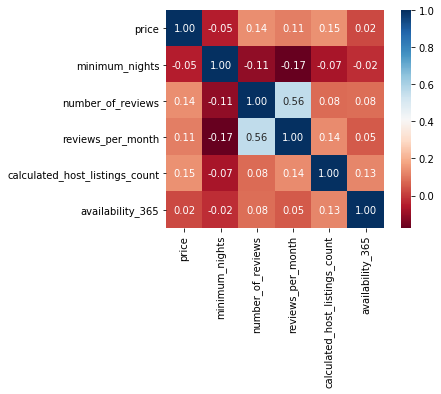

In [54]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável *room_type* indica o tipo de locação que está anunciada no Airbnb. Se você ja alugou ou anunciou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método *value_counts().italicized text*


In [55]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       9109
Entire home/apt    8534
Hotel room          351
Shared room         342
Name: room_type, dtype: int64

In [56]:
# mostrar a porcentagem de cada tipo de imóvel dsponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.496782
Entire home/apt    0.465423
Hotel room         0.019143
Shared room        0.018652
Name: room_type, dtype: float64

**Conforme análise realizada acima a quantidade maior de imóvel disponivel é do tipo quarto privado, seguido de apartamento/casas inteiras.**

### **Q7. Qual a localidade mais cara do México?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros *(neighbourhoods)* a partir do preço de locação.

In [57]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Cuajimalpa de Morelos     927.876712
Miguel Hidalgo            925.262184
Cuauhtémoc                850.281595
Álvaro Obregón            712.279446
La Magdalena Contreras    645.129771
Benito Juárez             637.301292
Milpa Alta                634.187500
Coyoacán                  604.121849
Venustiano Carranza       559.373938
Azcapotzalco              521.625532
Name: price, dtype: float64

Acima, vemos que Cuajimalpa de Morelos está no topo dos lugares mais caros do México seguido de Miguel Hidalgo. E com preços mais acessíveis podemos ver Azcapotzalco.

**Algumas atrações em Cuajimalpa de Morelos/México** 

Esse destino de luxo surpreende os visitantes com suas charmosas cafeterias, suas opções de entretenimento,música ao vivo e muito mais!

*   Parque nacional Desierto de Los Leones
*   Zocalo
*   Basilica de Santa Maria de Guadalupe
*   Passeo de La Reforma
*   Parque Chapultepec


Podemos analisar quantas entradas há para Cuajimalpa de Morelos.

In [63]:
# ver quantidade de imóveis em Cuajimalpa de Morelos
print (df[df.neighbourhood == "Cuajimalpa de Morelos"].shape)

# ver as entradas do Cuajimalpa de Morelo

df[df.neighbourhood == "Cuajimalpa de Morelos"]


(431, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,3874,1,0,NaN,NaN,2,363
5,75615,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.36585,-99.27911,Private room,3874,1,0,NaN,NaN,2,88
110,741663,Beautiful full furnished apartmente,3882003,Vera,NaN,Cuajimalpa de Morelos,19.36561,-99.27728,Entire home/apt,1162,360,0,NaN,NaN,1,365
116,783480,"Area Sta.Fe,IberoABC Hospital Rooms",4129056,Janet,NaN,Cuajimalpa de Morelos,19.35213,-99.28565,Private room,349,2,26,2018-12-16,0.38,2,360
364,2730414,Hermosa casa estilo chalet a 7 min de Santa Fe,13973690,Helen,NaN,Cuajimalpa de Morelos,19.34912,-99.29076,Entire home/apt,600,2,0,NaN,NaN,1,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20388,40182569,"Depa Santa Fe cerca de Ibero, y corazón Santa Fe",73834504,Manuel,NaN,Cuajimalpa de Morelos,19.36942,-99.26672,Entire home/apt,1104,1,1,2019-11-22,1.00,1,353
20406,40209524,Lujoso Departamento en AV Santa Fe,123077162,Laura,NaN,Cuajimalpa de Morelos,19.36146,-99.26771,Entire home/apt,1550,5,0,NaN,NaN,1,25
20478,40282856,4BD Beautiful house INTERLOMAS,86787502,Cinthya,NaN,Cuajimalpa de Morelos,19.38774,-99.27535,Entire home/apt,3777,2,0,NaN,NaN,1,79
20518,40309675,Loft Suite con la mejor ubicación de Santa Fe,257853661,Ramon,NaN,Cuajimalpa de Morelos,19.35930,-99.27023,Entire home/apt,1395,2,0,NaN,NaN,5,350


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se *x=longitude* e *y=latitude*

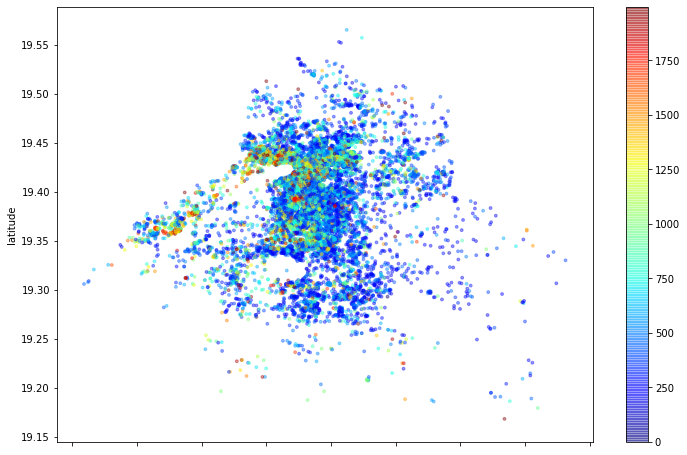

In [62]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));


**CONCLUSÕES**

Foi realizado uma análise superficial através do arquivo básico disponibilizado na plataforma do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

No Oeste do México concentra-se hospedagens mais caras devido ao luxo, cafeterias charmosas, além de outras atrações importantes.

Se quiser ir para o México, consegue visualizar claramente os lugares e valores mais atraentes através desse projeto.

Recomenda-se que seja utilizado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

